In [1]:
from RL.Env import Env
from RL.Agent import Agent
from Training import data_spilt, ReadH5d, create_data_loader
from Training import train_seg_net, test_seg_net
from Training import test_agent
from monai.transforms import *
from monai.networks.nets import DynUNet, SwinUNETR
from monai.losses import DiceFocalLoss
import torch
import random
from Training.training_helpers import post_process, dice_coefficient

batch_size=6
num_epoch=1000
device = 'cuda:0'


seg_list, rl_list, holdout_list = data_spilt('/home/xiangcen/RLModality/picai_h5', 110, 100, 10)
seg_list_promise, rl_list_promise, holdout_list_promise = data_spilt('/home/xiangcen/RLModality/promise_h5', 231, 180, 20)

train_list = rl_list + rl_list_promise
test_list = holdout_list + holdout_list_promise
_dir = rl_list[34]


device = 'cuda:0'
seg_model = SwinUNETR(
    img_size = (128, 128, 32),
    in_channels = 2,
    out_channels = 1,
    depths = (2, 2, 2, 2),
    num_heads = (3, 6, 12, 24),
    drop_rate = 0.1,
    attn_drop_rate = 0.1,
    dropout_path_rate = 0.1,
    downsample="mergingv2",
    use_v2=True,
)
seg_model.load_state_dict(torch.load("/home/xiangcen/RLModality/models/segmentation.ptm", map_location=device, weights_only=True))
seg_model.eval()



device = 'cpu'
eps_length = 60
learn_length = 30
batch_size = 30
n_epochs = 3

train_dir = _dir

env = Env(train_dir, seg_model, eps_length)
obs = env.reset()


gt = env.gt
both_seg = env.both_seg 
t2_seg = env.t2_seg 
hb_seg = env.hb_seg


t2 = env.t2 
hb = env.hb 


/home/xiangcen/miniconda3/envs/dl/lib/python3.12/site-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.networks.nets.swin_unetr SwinUNETR.__init__:img_size: Argument `img_size` has been deprecated since version 1.3. It will be removed in version 1.5. The img_size argument is not required anymore and checks on the input size are run during forward().
  warn_deprecated(argname, msg, warning_category)


In [ ]:
actions = [
    (2, 0, 3, 2),
    (2, 2, 2, 2),
    (1, 2, 2, 2),
    (2, 1, 2, 2),
    (2, 1, 2, 3),
    (2, 2, 0, 1),
    (2, 0, 1, 3),
    (2, 0, 0, 1),
    (2, 1, 2, 1),
    (2, 0, 0, 3)
]



predictions = []
for action in actions:
    next_obs, reward= env.step_train(action)
    # print(env.calculate_current_accuracy().item())
    print(dice_coefficient(env.current_segmentation, gt, post=False))
    predictions.append(env.current_segmentation.clone())




tensor(0., dtype=torch.float64)
tensor(0.1957, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.4171, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(0.1957, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.4171, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)
tensor(0.3640, dtype=torch.float64)


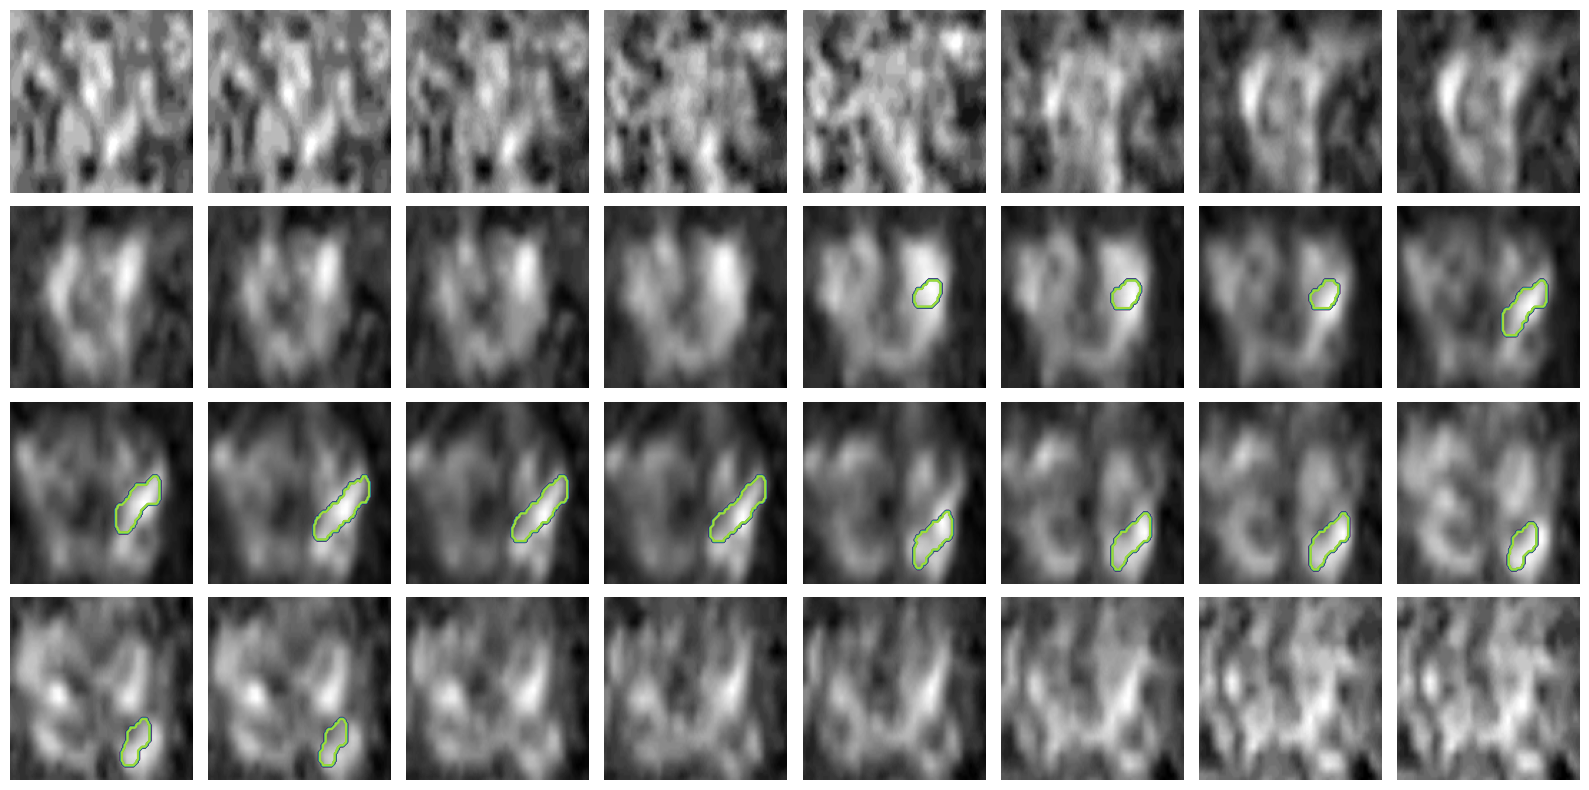

In [4]:
import matplotlib.pyplot as plt
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(hb[0, :, :, i], cmap='gray')  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.contour(gt[0, :, :, i])
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

tensor([0.])


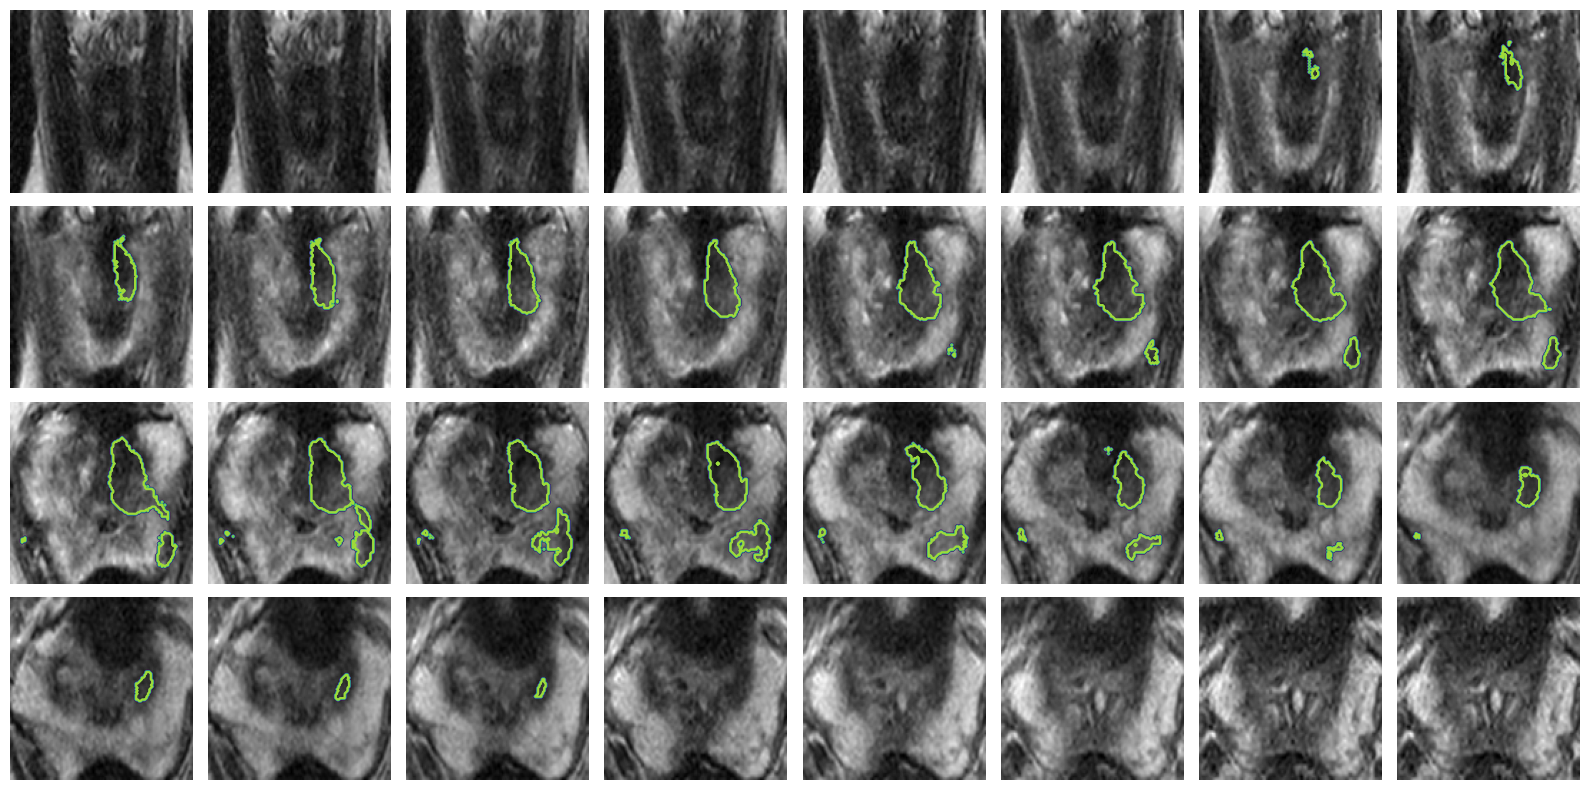

In [17]:


img = predictions[0]
print(torch.unique(img))
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(t2[0, :, :, i], cmap='gray')
    ax.contour(t2_seg[0, :, :, i])  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

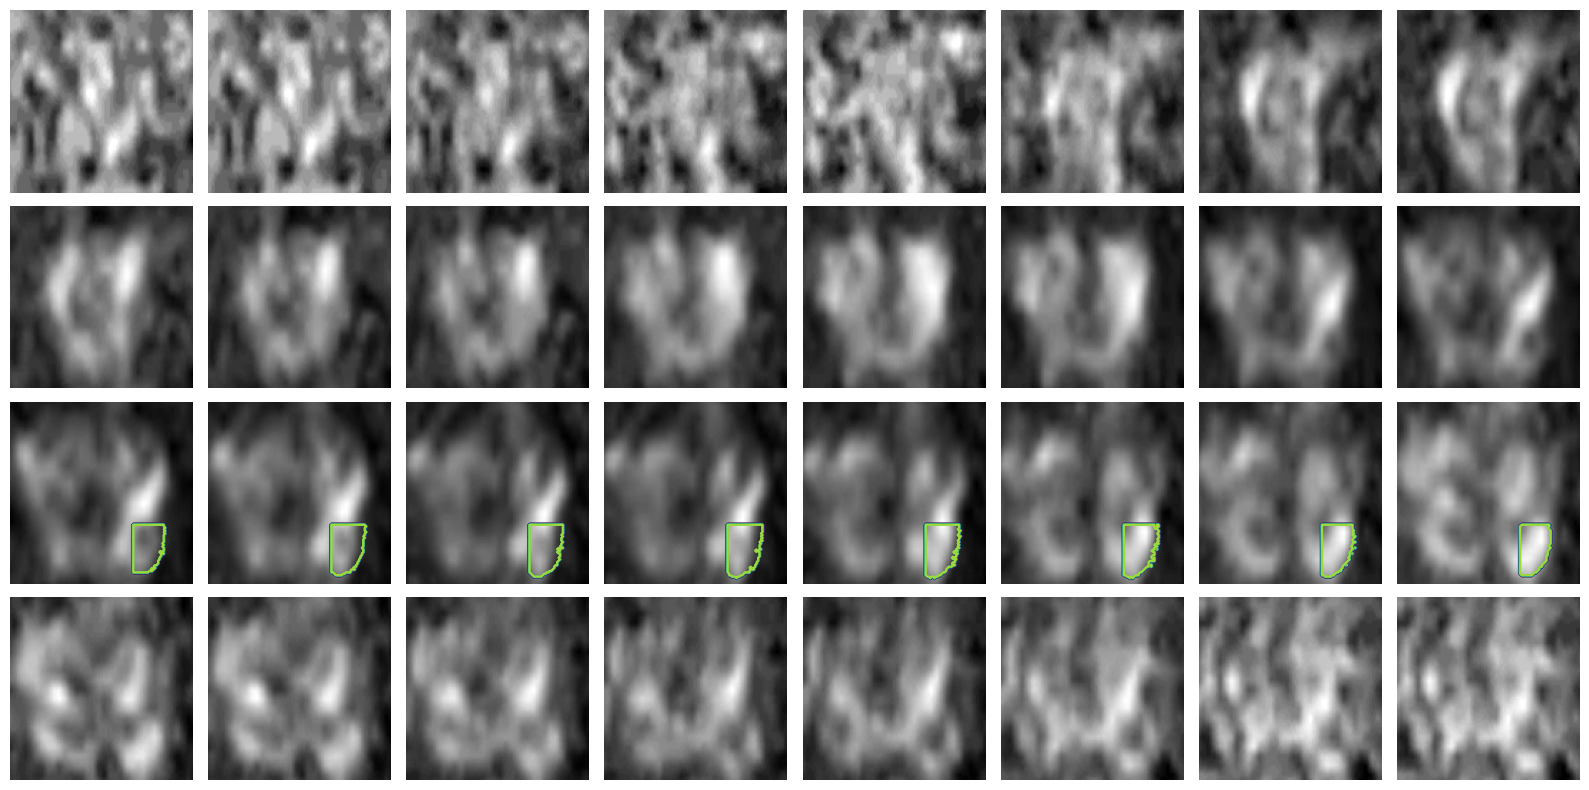

In [10]:
img = predictions[1]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    ax.imshow(hb[0, :, :, i], cmap='gray')
    ax.contour(img[0, :, :, i])  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

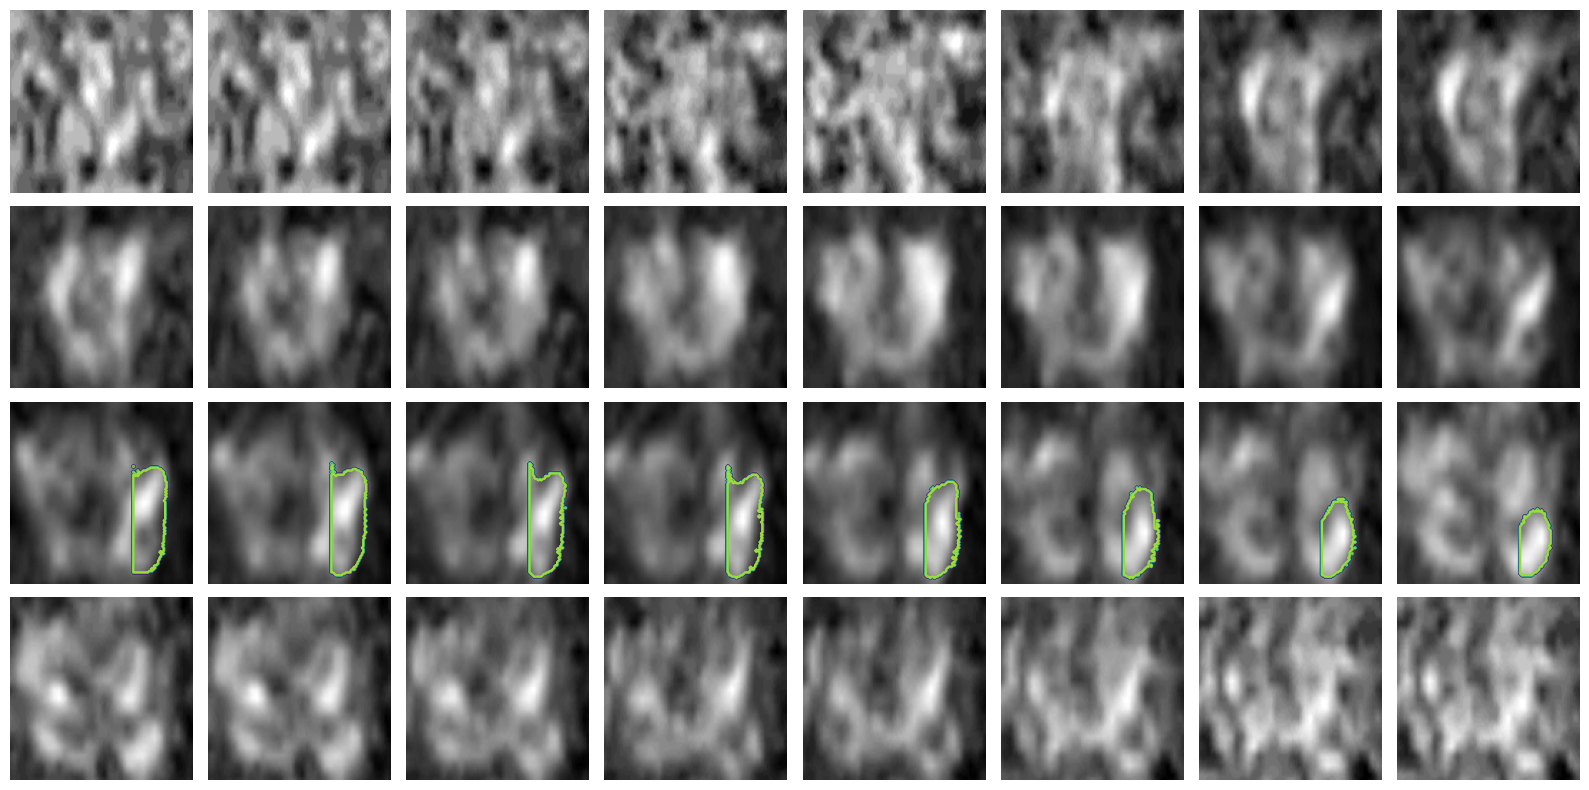

In [11]:
img = predictions[2]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(hb[0, :, :, i], cmap='gray')
    ax.contour(img[0, :, :, i])  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

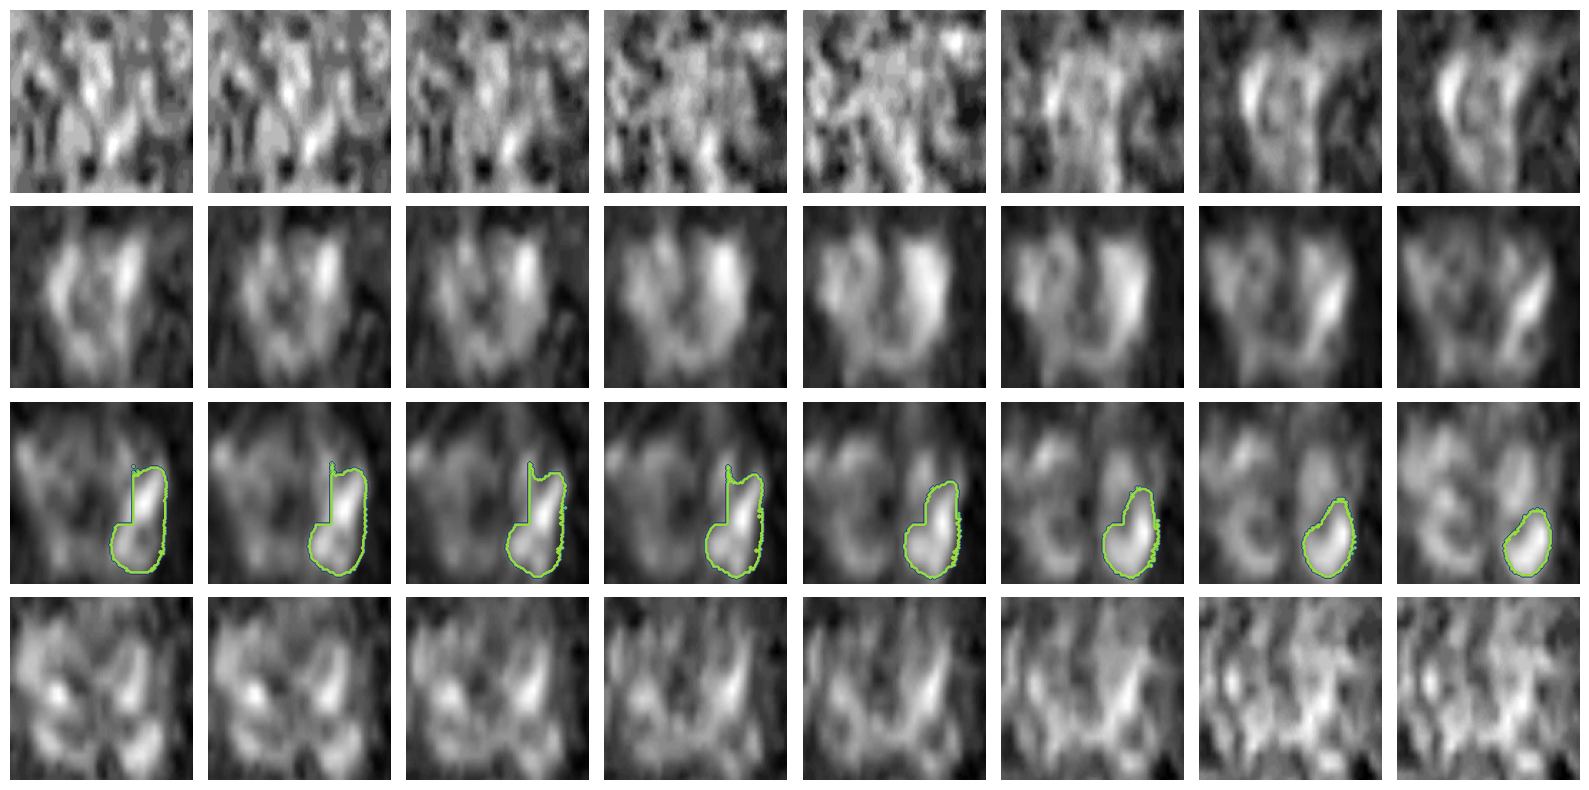

In [12]:
img = predictions[3]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(hb[0, :, :, i], cmap='gray')
    ax.contour(img[0, :, :, i])  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

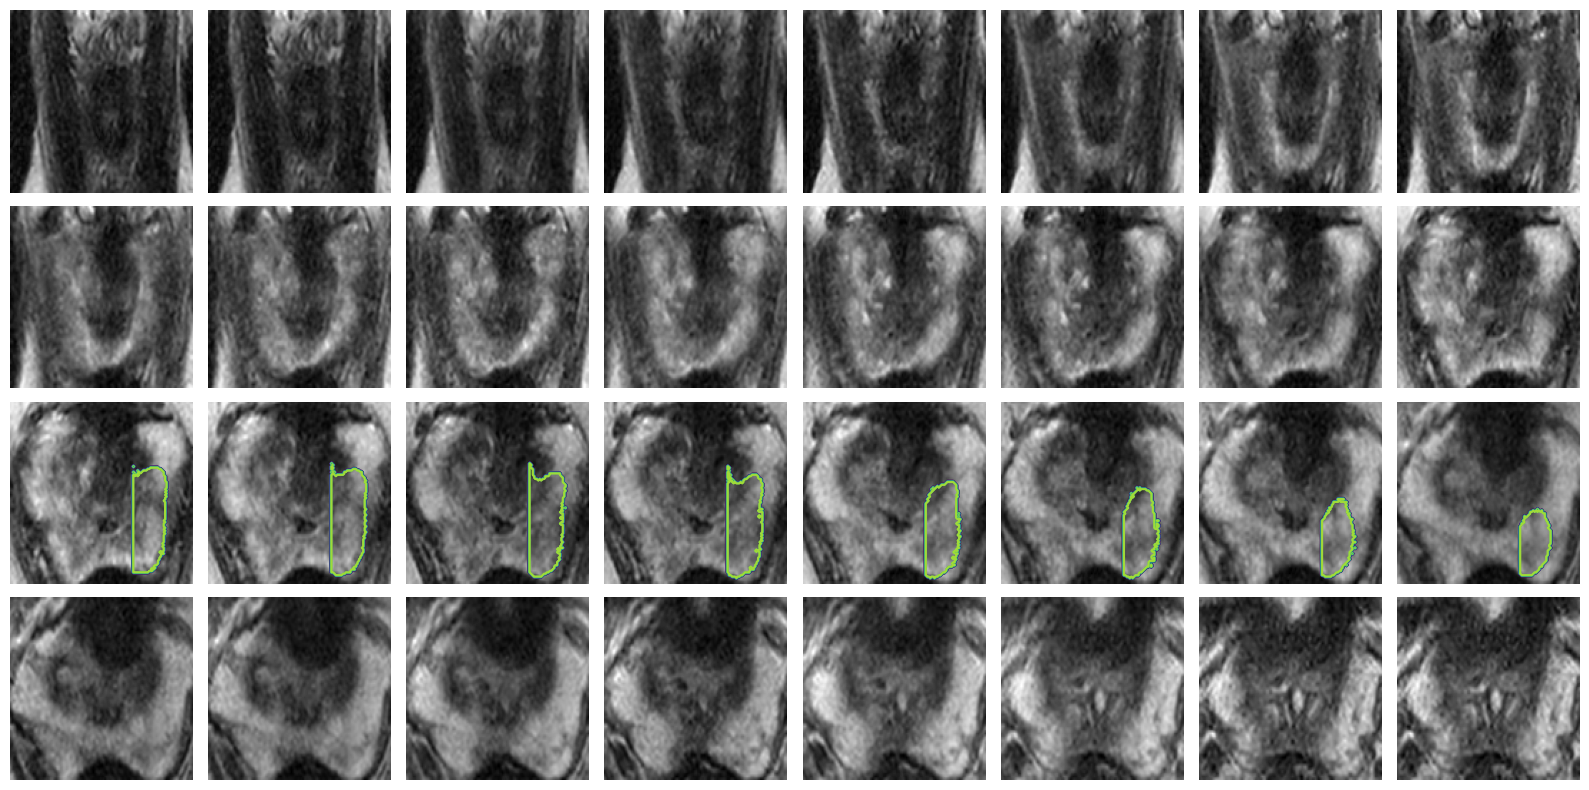

In [13]:
img = predictions[4]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(t2[0, :, :, i], cmap='gray')
    ax.contour(img[0, :, :, i])  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

In [ ]:
img = predictions[5]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(img[0, :, :, i], cmap='gray')  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

In [ ]:
img = predictions[6]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(img[0, :, :, i], cmap='gray')  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

In [ ]:
img = predictions[7]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(img[0, :, :, i], cmap='gray')  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

In [ ]:
img = predictions[8]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(img[0, :, :, i], cmap='gray')  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()

In [ ]:
img = predictions[9]
# Define the grid size
rows = 4
cols = 8

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize as needed

# Plot each image
for i, ax in enumerate(axes.flat):
    
    ax.imshow(img[0, :, :, i], cmap='gray')  # Use appropriate colormap (e.g., 'gray' or 'viridis')
    ax.axis('off')  # Hide axis


# Adjust layout
plt.tight_layout()